<a href="https://colab.research.google.com/github/Raflianjay/TubesSKO_MuhammadRafliAA/blob/main/TubesSKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada skenario untuk perancangan FTTB ini, pertama-tama dimulai dari Sentral kemudian masuk ke ODC seperti pada gambar melalui kabel Feeder, lalu masuk ke ODP melalui kabel distribusi, Setelah itu masuk ke ODP menggunakan kabel Distribusi dan terakhir masuk ke Roset melalui kabel drop. Terdapat Gedung di kota Bandung yang memiliki 6 lantai, pada Gedung tersebut terdapat 20 kamar pada setiap lantainya. Jadi, untuk perancangan kali ini saya menggunakan Jenis Fiber G625D dengan Panjang gelombang 1310 nm dengan redaman 0,32 dB/Km, dan akan menggunakan 4 konektor dan 2 spliter, pada spliternya digunakan spliter 1:32 dengan redaman 18,5 dB, kemudian untuk ONU ke ODP menggunakan spliter 1:16 dengan redaman 15 dB untuk ODP ke Roset. Selain itu, karena jumlah konektor yang digunakan ada 6 dan spliternya ada 4, maka splicernya ada 8 buah dengan redaman 0,35 dB

In [5]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.8 #Responsifitas
SM = 6   #Safety Margin
M = -0.23 #Tambahan daya sinyal
q = 1.6*10**-19 #muatan
id = 90*10**-9 #Arus gelap (Ampere)
B = 9*10**9 #Bandwith
F = 1 #Faktor Gain
K = 1.38*10**-23 #Boltzmann
T = 300 #Suhu
RL = 50 #Resistansi Ekivalen

#Parameter Pr
#jarak dari sentral ke ONU = 20 km
#jarak dari ONU ke Roset = <500 m --> 5*6 = 30 m
#jarak total = 20000 + 30 = 20030 m

d = np.arange(0.03,20.031,1) #Jarak (km)
L_fiber = 0.32 #berdasarkan jenis G657A2 (dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.35 #Loss dari splicer (db)
N_connector = 4 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 15 + 18.5 #Redaman Splitter 1:16 + Redaman 1:32
Pt = 5 #Daya tx (dBm)

In [7]:
#RUMUS PR
def P_receive():
  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-38.5096 -38.8296 -39.1496 -39.4696 -39.7896 -40.1096 -40.4296 -40.7496
 -41.0696 -41.3896 -41.7096 -42.0296 -42.3496 -42.6696 -42.9896 -43.3096
 -43.6296 -43.9496 -44.2696 -44.5896 -44.9096]


In [8]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [1.12753488e-04 1.04744201e-04 9.73038417e-05 9.03919982e-05
 8.39711280e-05 7.80063553e-05 7.24652821e-05 6.73178112e-05
 6.25359839e-05 5.80938270e-05 5.39672126e-05 5.01337264e-05
 4.65725467e-05 4.32643304e-05 4.01911087e-05 3.73361891e-05
 3.46840646e-05 3.22203302e-05 2.99316037e-05 2.78054538e-05
 2.58303319e-05]


In [9]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [6.72536170e-10 5.80384287e-10 5.00859189e-10 4.32230736e-10
 3.73005853e-10 3.21896049e-10 2.77789385e-10 2.39726280e-10
 2.06878637e-10 1.78531826e-10 1.54069136e-10 1.32958359e-10
 1.14740211e-10 9.90183411e-11 8.54507042e-11 7.37421246e-11
 6.36378716e-11 5.49181180e-11 4.73931577e-11 4.08992784e-11
 3.52951999e-11]


In [10]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*T*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[23.50885186 22.87061987 22.23226294 21.59378985 20.95520878 20.31652733
 19.67775258 19.0388911  18.39994902 17.76093203 17.1218454  16.48269407
 15.8434826  15.20421525 14.56489597 13.92552843 13.28611604 12.64666199
 12.00716921 11.36764046 10.72807829]


In [11]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[7.4888063  6.95826554 6.46521767 6.00702579 5.58123672 5.18556844
 4.81789835 4.47625232 4.15879445 3.8638175  3.58973405 3.33506811
 3.09844745 2.87859633 2.67432881 2.48454247 2.30821259 2.14438669
 1.99217949 1.85076819 1.71938811]


In [12]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.24567067e-11 5.34408353e-10 1.35871065e-08 2.19852020e-07
 2.40790674e-06 1.88265578e-05 1.10025771e-04 5.00104869e-04
 1.82966596e-03 5.55004837e-03 1.43202792e-02 3.21318342e-02
 6.39055801e-02 1.14530160e-01 1.87611805e-01 2.84378667e-01
 4.03124149e-01 5.39342203e-01 6.86450082e-01 8.36831847e-01
 9.82907048e-01]


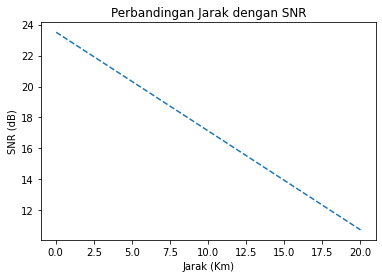

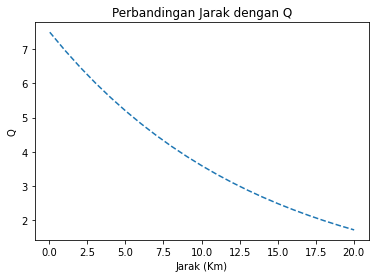

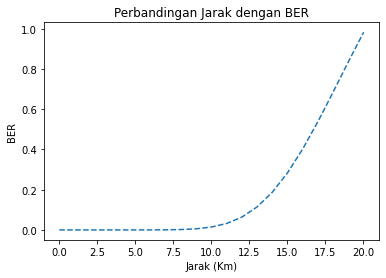

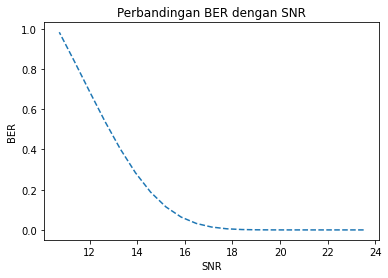

In [13]:
#GRAFIK
def grafik_pertama():
  plt.figure()
  plt.plot(d,SNR,'--')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_kedua():
  plt.figure()
  plt.plot(d,Q,'--')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_ketiga():
  plt.figure()
  plt.plot(d,BER,'--')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def grafik_perbandingan_BER_SNR():
  plt.figure()
  plt.plot(SNR,BER,'--')
  plt.title('Perbandingan BER dengan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()

grafik_pertama()
grafik_kedua()
grafik_ketiga()
grafik_perbandingan_BER_SNR()